# Lab 1 Analysis Example using Thicket

In [125]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [228]:
CUDA_HOME = "/home/crnicholls20/project/CUDA/temp_cali/"
MPI_HOME = "/home/crnicholls20/project/MPI/cali/"

# 1 for MPI, 2 for CUDA
run_type = 2
#1 for strong scaling, 2 for weak scaling, 3 for speedup
sort_type = 3

Read in all the files

In [229]:
data_size_list = [65536, 262144, 1048579, 4194304, 16777216, 67108864, 268435456]
data_type_list = ["Sorted", "ReverseSorted", "Random", "1%Perturbed"]
tk_list = []
HOME = ""
if(run_type == 1):
    HOME = MPI_HOME
else:
    HOME = CUDA_HOME
if(sort_type == 1):
    # MPI strong scaling size 65536
    tk_list.append(th.Thicket.from_caliperreader(glob(HOME + "*65536*.cali")))
    # MPI strong scaling size 262144
    tk_list.append(th.Thicket.from_caliperreader(glob(HOME + "*262144*.cali")))
    # MPI strong scaling size 1048576
    tk_list.append(th.Thicket.from_caliperreader(glob(HOME + "*1048576*.cali")))
    # MPI strong scaling size 4194304
    tk_list.append(th.Thicket.from_caliperreader(glob(HOME + "*4194304*.cali")))
    # MPI strong scaling size 16777216
    tk_list.append(th.Thicket.from_caliperreader(glob(HOME + "*16777216*.cali")))
    # MPI strong scaling size 67108864
    tk_list.append(th.Thicket.from_caliperreader(glob(HOME + "*67108864*.cali")))
        # MPI strong scaling size 268435456
    tk_list.append(th.Thicket.from_caliperreader(glob(HOME + "*268435456*.cali")))
else:
    # MPI weak scaling/speedup Sorted
    tk_list.append(th.Thicket.from_caliperreader(glob(HOME + "*-ds.cali")))
    # MPI weak scaling ReverseSorted
    tk_list.append(th.Thicket.from_caliperreader(glob(HOME + "*-dr.cali")))
    # MPI weak scaling Random
    tk_list.append(th.Thicket.from_caliperreader(glob(HOME + "*-da.cali")))
    # MPI weak scaling 1%Perturbed
    tk_list.append(th.Thicket.from_caliperreader(glob(HOME + "*-dp.cali")))

# CUDA strong scaling size 65536
# tk2 = th.Thicket.from_caliperreader(glob(CUDA_HOME + "*65536*.cali"))
# CUDA strong scaling size 262144
# tk2 = th.Thicket.from_caliperreader(glob(CUDA_HOME + "*262144*.cali"))
# CUDA strong scaling size 1048576
#tk2 = th.Thicket.from_caliperreader(glob(CUDA_HOME + "*1048576*.cali"))
# CUDA strong scaling size 4194304
#tk2 = th.Thicket.from_caliperreader(glob(CUDA_HOME + "*4194304*.cali"))
# CUDA strong scaling size 16777216
#tk2 = th.Thicket.from_caliperreader(glob(CUDA_HOME + "*16777216*.cali"))
# CUDA strong scaling size 67108864
#tk2 = th.Thicket.from_caliperreader(glob(CUDA_HOME + "*67108864*.cali"))
# CUDA strong scaling size 268435456
#tk2 = th.Thicket.from_caliperreader(glob("CUDA_HOME + "*68435456*.cali"))



# CUDA weak scaling/speedup Sorted
# tk2 = th.Thicket.from_caliperreader(glob("/home/crnicholls20/project/CUDA/cali/*-dr.cali"))
#tk2 = th.Thicket.from_caliperreader(glob("/home/crnicholls20/project/CUDA/cali/*-ds.cali"))
# CUDA weak scaling Random
#tk2 = th.Thicket.from_caliperreader(glob("/home/crnicholls20/project/CUDA/cali/*-da.cali"))
# CUDA weak scaling ReverseSorted
#tk2 = th.Thicket.from_caliperreader(glob("/home/crnicholls20/project/CUDA/cali/*-dr.cali"))
# CUDA weak scaling 1%Perturbed
#tk2 = th.Thicket.from_caliperreader(glob("/home/crnicholls20/project/CUDA/cali/*-dp.cali"))

# algorithm comparison MPI
# # tk = th.Thicket.from_caliperreader(glob(MPI_HOME + "*.cali"))

# algorithm comparison CUDA
# tk2 = th.Thicket.from_caliperreader(glob("/home/crnicholls20/project/CUDA/cali/*.cali"))

In [230]:
# Performance data
# tk2.dataframe

In [231]:
if(run_type == 1): 
    for tk in tk_list:
        tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Variance time/rank", "Min time/rank", "Max time/rank", "Total time"], axis = 1)
else:
    for tk2 in tk_list:
        tk2.dataframe = tk2.dataframe.drop(['nid','spot.channel','Min time/rank','Max time/rank', 'Total time', 'Avg GPU time/rank', 'Min GPU time/rank', 'Max GPU time/rank', 'Total GPU time'], axis = 1)

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [232]:
# print(tk.dataframe.columns)

In [233]:
tk_list[1].metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,
215125696,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t1024}-v262144-dr.cali,1702179559,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort_cuda, 262144, 1024}, r]",g,MergeSort,CUDA,Double,8,262144,ReverseSorted,1,1024,2,25,Online/AI/Handwritten
219595590,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t128-v16777216-dr.cali,1702179523,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort_cuda, 16777216, 128, r]",g,MergeSort,CUDA,Double,8,16777216,ReverseSorted,1,128,1025,25,Online/AI/Handwritten
234124364,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t256-v16777216-dr.cali,1702179539,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort_cuda, 16777216, 256, r]",g,MergeSort,CUDA,Double,8,16777216,ReverseSorted,1,256,257,25,Online/AI/Handwritten
552415398,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t128-v{65536-dr.cali,1702179523,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort_cuda, {65536, 128, r]",g,MergeSort,CUDA,Double,8,0,ReverseSorted,1,128,2,25,Online/AI/Handwritten
627949798,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t256-v{65536-dr.cali,1702179539,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort_cuda, {65536, 256, r]",g,MergeSort,CUDA,Double,8,0,ReverseSorted,1,256,2,25,Online/AI/Handwritten
675698493,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t64-v262144-dr.cali,1702180730,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort_cuda, 262144, 64, r]",g,MergeSort,CUDA,Double,8,262144,ReverseSorted,1,64,65,25,Online/AI/Handwritten
917922562,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t1024}-v4194304-dr.cali,1702179559,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort_cuda, 4194304, 1024}, r]",g,MergeSort,CUDA,Double,8,4194304,ReverseSorted,1,1024,5,25,Online/AI/Handwritten
1145947375,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t128-v262144-dr.cali,1702179523,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort_cuda, 262144, 128, r]",g,MergeSort,CUDA,Double,8,262144,ReverseSorted,1,128,17,25,Online/AI/Handwritten
1307736952,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t128-v4194304-dr.cali,1702179523,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mergesort_cuda, 4194304, 128, r]",g,MergeSort,CUDA,Double,8,4194304,ReverseSorted,1,128,257,25,Online/AI/Handwritten


In [234]:
# tk.statsframe.dataframe["time"] = 1
# print(tk.tree())

In [235]:
# strong
if(sort_type == 1):
    for i in range(0,len(tk_list)):
        tk_list[i] = tk_list[i].groupby("InputType")
else:
    for i in range(0,len(tk_list)):
        tk_list[i] = tk_list[i].groupby("InputSize")

# compare
# gb = tk.groupby("Algorithm")
# gb2 = tk2.groupby("Algorithm")

7  thickets created...
{0: <thicket.thicket.Thicket object at 0x2ac05d1d0640>, 262144: <thicket.thicket.Thicket object at 0x2ac05d853910>, 1048576: <thicket.thicket.Thicket object at 0x2ac0599e8580>, 4194304: <thicket.thicket.Thicket object at 0x2ac05d0679a0>, 16777216: <thicket.thicket.Thicket object at 0x2ac0598d5c70>, 67108864: <thicket.thicket.Thicket object at 0x2ac05d60c520>, 268435456: <thicket.thicket.Thicket object at 0x2ac059912ac0>}
7  thickets created...
{0: <thicket.thicket.Thicket object at 0x2ac05c1a39d0>, 262144: <thicket.thicket.Thicket object at 0x2ac05bafdd90>, 1048576: <thicket.thicket.Thicket object at 0x2ac05d312970>, 4194304: <thicket.thicket.Thicket object at 0x2ac05dd10c40>, 16777216: <thicket.thicket.Thicket object at 0x2ac0599ec100>, 67108864: <thicket.thicket.Thicket object at 0x2ac059825d30>, 268435456: <thicket.thicket.Thicket object at 0x2ac05d2f9190>}
7  thickets created...
{0: <thicket.thicket.Thicket object at 0x2ac0598c8100>, 262144: <thicket.thicket.

Compose these 3 groups column-wise to get a holistic view of the data

In [236]:
#i = 0
#for key in list(gb.keys()):
#    print(i)
#    print(gb[key].profile_mapping)
#    print(gb[key].metadata["num_procs"])
#    i += 1

In [237]:
for i in range(0,len(tk_list)):
    tk_list[i] = th.Thicket.concat_thickets(
        thickets=list(tk_list[i].values()),
        headers=list(tk_list[i].keys()),
        axis="columns",
        metadata_key="num_threads"
    )

In [238]:
# ctk.metadata

In [239]:
# ctk2.dataframe

Perform pandas operations to get the table in a desirable format for plotting

In [240]:
for i in range(0,len(tk_list)):
    # Drop unwanted columns
    tk_list[i].dataframe = tk_list[i].dataframe.reset_index().drop([("node","")], axis=1)
    # Rename index to remove tuple
    tk_list[i].dataframe = tk_list[i].dataframe.rename({("name", ""): "name", ("Avg time/rank", ""): "Avg time/rank", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

In [241]:
# ctk.dataframe

In [242]:
# Define common variables
function_names = set({"main", "comp_large", "comm"})
num_procs = sorted(list(set(tk_list[0].dataframe.index.get_level_values("num_threads"))))
inputs = sorted(list(set(tk_list[0].dataframe.columns.get_level_values(0))))

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [243]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

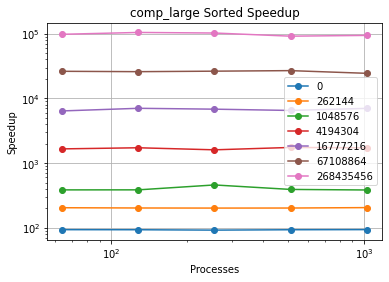

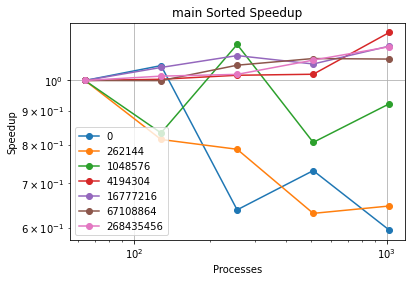

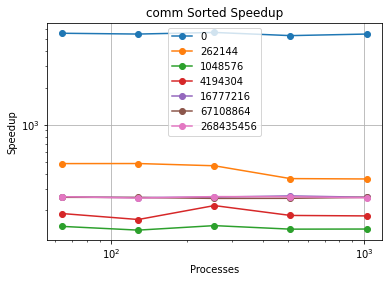

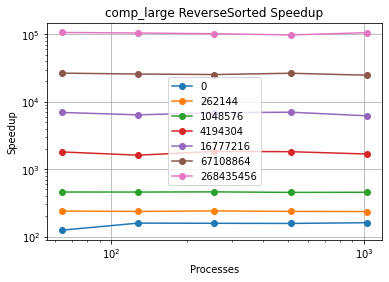

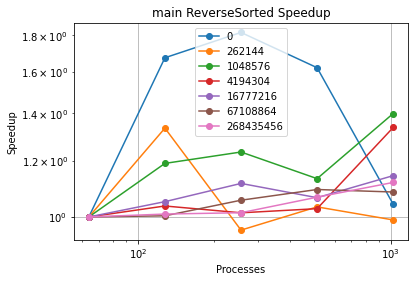

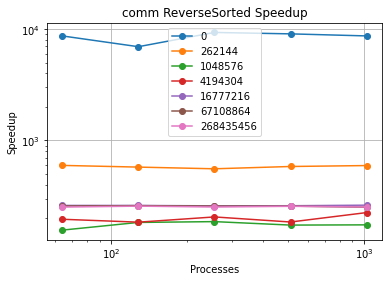

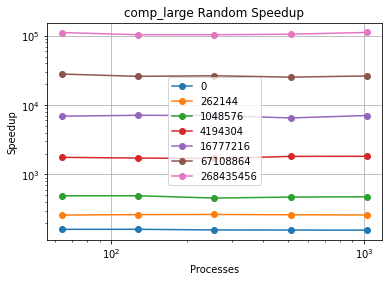

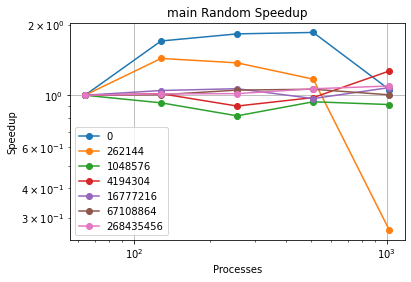

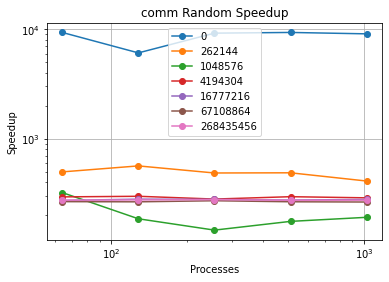

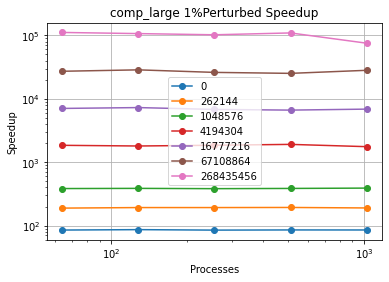

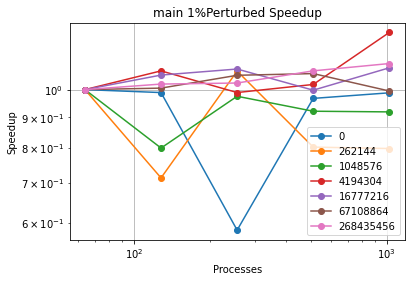

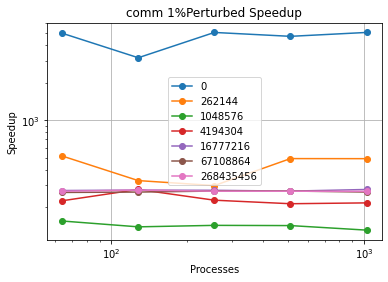

In [245]:
if(sort_type == 3):
    for i in range(0,len(tk_list)):
        for name in function_names:
            plot_pandas(
               df=(tk_list[i].dataframe.iloc[0]/tk_list[i].dataframe).loc[name].droplevel(1, axis = 1),
               title=name + ' ' + data_type_list[i] + ' Speedup',
               xlabel="Processes",
               ylabel="Speedup",
               loglog=True
            )
else:
    if(sort_type == 1):
        for i in range(0,len(tk_list)):
            for name in function_names:
                plot_pandas(
                    df=tk_list[i].dataframe.loc[name].droplevel(1, axis = 1),
                    title=name + ' ' + str(data_size_list[i]) + ' procs',
                    xlabel="Processes",
                    ylabel="Avg Time (seconds)",
                    loglog=True
                )   
    else:
        for i in range(0,len(tk_list)):
            for name in function_names:
                plot_pandas(
                    df=tk_list[i].dataframe.loc[name].droplevel(1, axis = 1),
                    title=name + ' ' + data_type_list[i],
                    xlabel="Processes",
                    ylabel="Avg Time (seconds)",
                    loglog=True
                )   